In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [91]:
df = pd.read_csv('./merged_gdf.csv')

In [92]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('facil_name', axis=1)

In [93]:
df =df[df.road_type != 0]

In [94]:
df['timeslot'] = df['timeslot'].replace('all', '24')  # 'all'을 24로 변환
df['timeslot'] = df['timeslot'].astype(int)
df = df[df['timeslot']!=24]

In [95]:
df_encoded = pd.get_dummies(df, columns=['link_direction']) # 상행 하행 정보 원핫인코딩

In [96]:
df_encoded

,year,link_id,road_length,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT,...,dw_lanes,oneway,length,up_its_id,dw_its_id,geometry,road_rank,road_name,link_direction_1,link_direction_2
0,2020,467845227,0.711,평택시,포승읍,0,347,229,3,115,...,0,1,711.103731,2140018400,0,LINESTRING (126.8688800359074 37.0000468696854...,101,서해안고속도로,True,False
1,2020,467845227,0.711,평택시,포승읍,1,368,232,3,132,...,0,1,711.103731,2140018400,0,LINESTRING (126.8688800359074 37.0000468696854...,101,서해안고속도로,True,False
2,2020,467845227,0.711,평택시,포승읍,10,3263,2111,32,1120,...,0,1,711.103731,2140018400,0,LINESTRING (126.8688800359074 37.0000468696854...,101,서해안고속도로,True,False
3,2020,467845227,0.711,평택시,포승읍,11,3450,2157,42,1251,...,0,1,711.103731,2140018400,0,LINESTRING (126.8688800359074 37.0000468696854...,101,서해안고속도로,True,False
4,2020,467845227,0.711,평택시,포승읍,12,3189,1960,37,1192,...,0,1,711.103731,2140018400,0,LINESTRING (126.8688800359074 37.0000468696854...,101,서해안고속도로,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407426,2022,571360198,0.431,오산시,신장동,21,371,311,7,53,...,0,1,0.431000,2230158600,0,LINESTRING (127.04054756208156 37.176162246732...,107,서부로,True,False
3407427,2022,571360198,0.431,오산시,신장동,22,276,241,2,33,...,0,1,0.431000,2230158600,0,LINESTRING (127.04054756208156 37.176162246732...,107,서부로,True,False
3407428,2022,571360198,0.431,오산시,신장동,22,276,241,2,33,...,0,1,0.431000,2230158600,0,LINESTRING (127.04054756208156 37.176162246732...,107,서부로,True,False
3407429,2022,571360198,0.431,오산시,신장동,23,206,161,1,44,...,0,1,0.431000,2230158600,0,LINESTRING (127.04054756208156 37.176162246732...,107,서부로,True,False



Training GRU model...
Epoch 1/100, Train Loss: 0.4043, Val Loss: 0.2347
Epoch 2/100, Train Loss: 0.2321, Val Loss: 0.2118
Epoch 3/100, Train Loss: 0.2032, Val Loss: 0.1848
Epoch 4/100, Train Loss: 0.1969, Val Loss: 0.1815
Epoch 5/100, Train Loss: 0.1885, Val Loss: 0.1759
Epoch 6/100, Train Loss: 0.1805, Val Loss: 0.1738
Epoch 7/100, Train Loss: 0.1766, Val Loss: 0.1708
Epoch 8/100, Train Loss: 0.1733, Val Loss: 0.1674
Epoch 9/100, Train Loss: 0.1746, Val Loss: 0.1896
Epoch 10/100, Train Loss: 0.1730, Val Loss: 0.1665
Epoch 11/100, Train Loss: 0.1699, Val Loss: 0.1654
Epoch 12/100, Train Loss: 0.1696, Val Loss: 0.1635
Epoch 13/100, Train Loss: 0.1697, Val Loss: 0.1644
Epoch 14/100, Train Loss: 0.1723, Val Loss: 0.1731
Epoch 15/100, Train Loss: 0.1711, Val Loss: 0.1644
Epoch 16/100, Train Loss: 0.1659, Val Loss: 0.1644
Epoch 17/100, Train Loss: 0.1656, Val Loss: 0.1610
Epoch 18/100, Train Loss: 0.1646, Val Loss: 0.1625
Epoch 19/100, Train Loss: 0.1652, Val Loss: 0.1682
Epoch 20/100, Tra

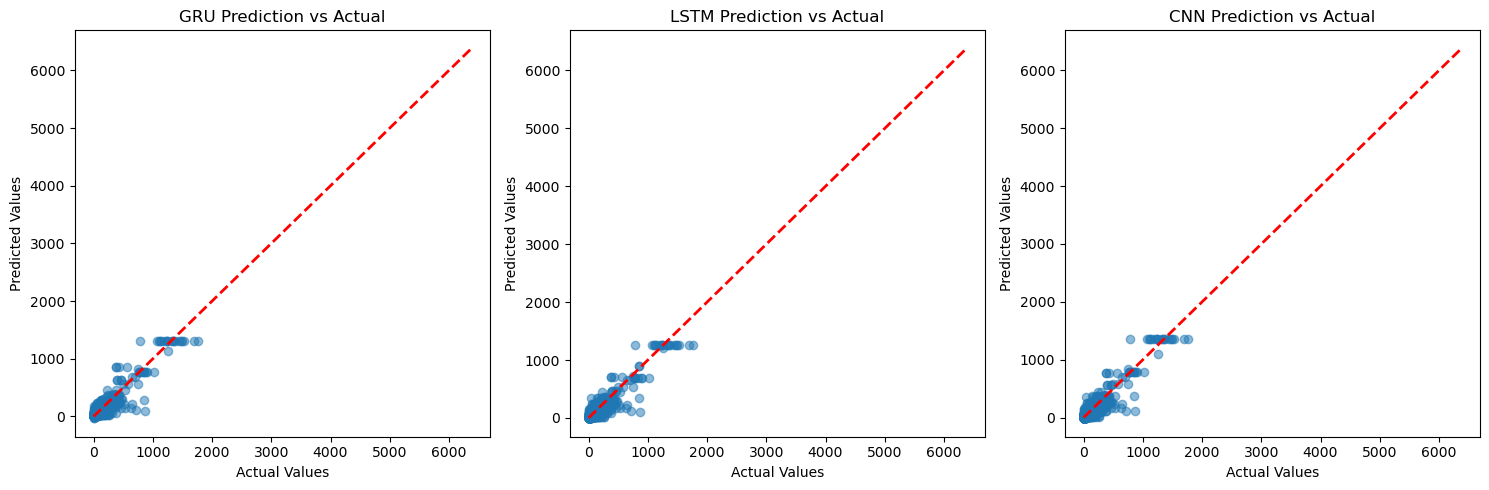

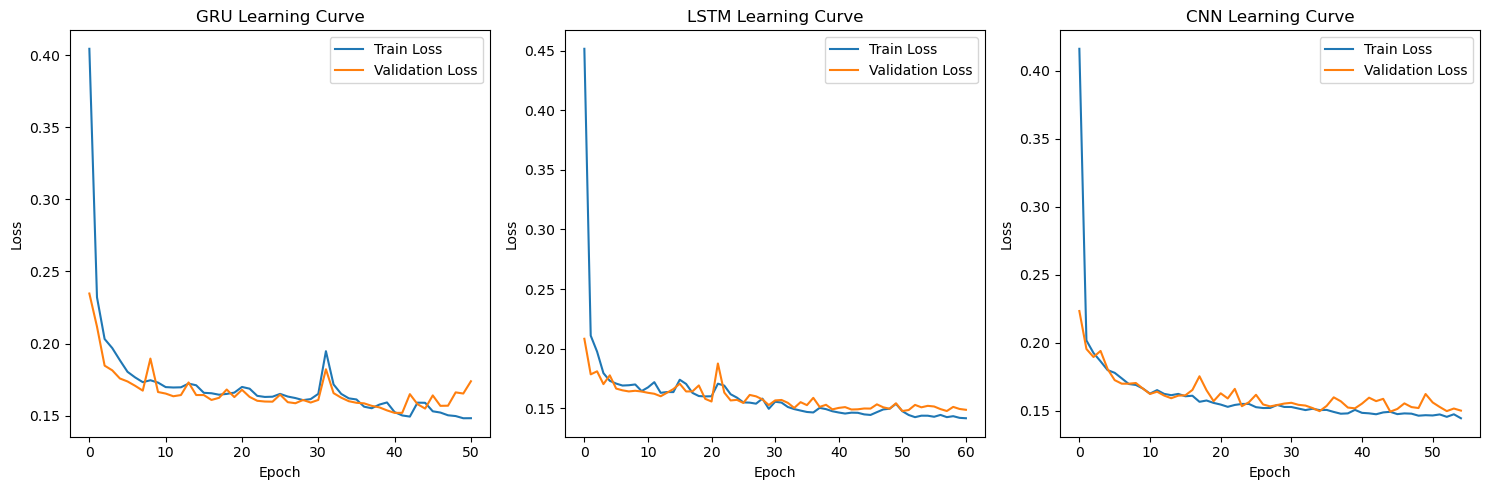

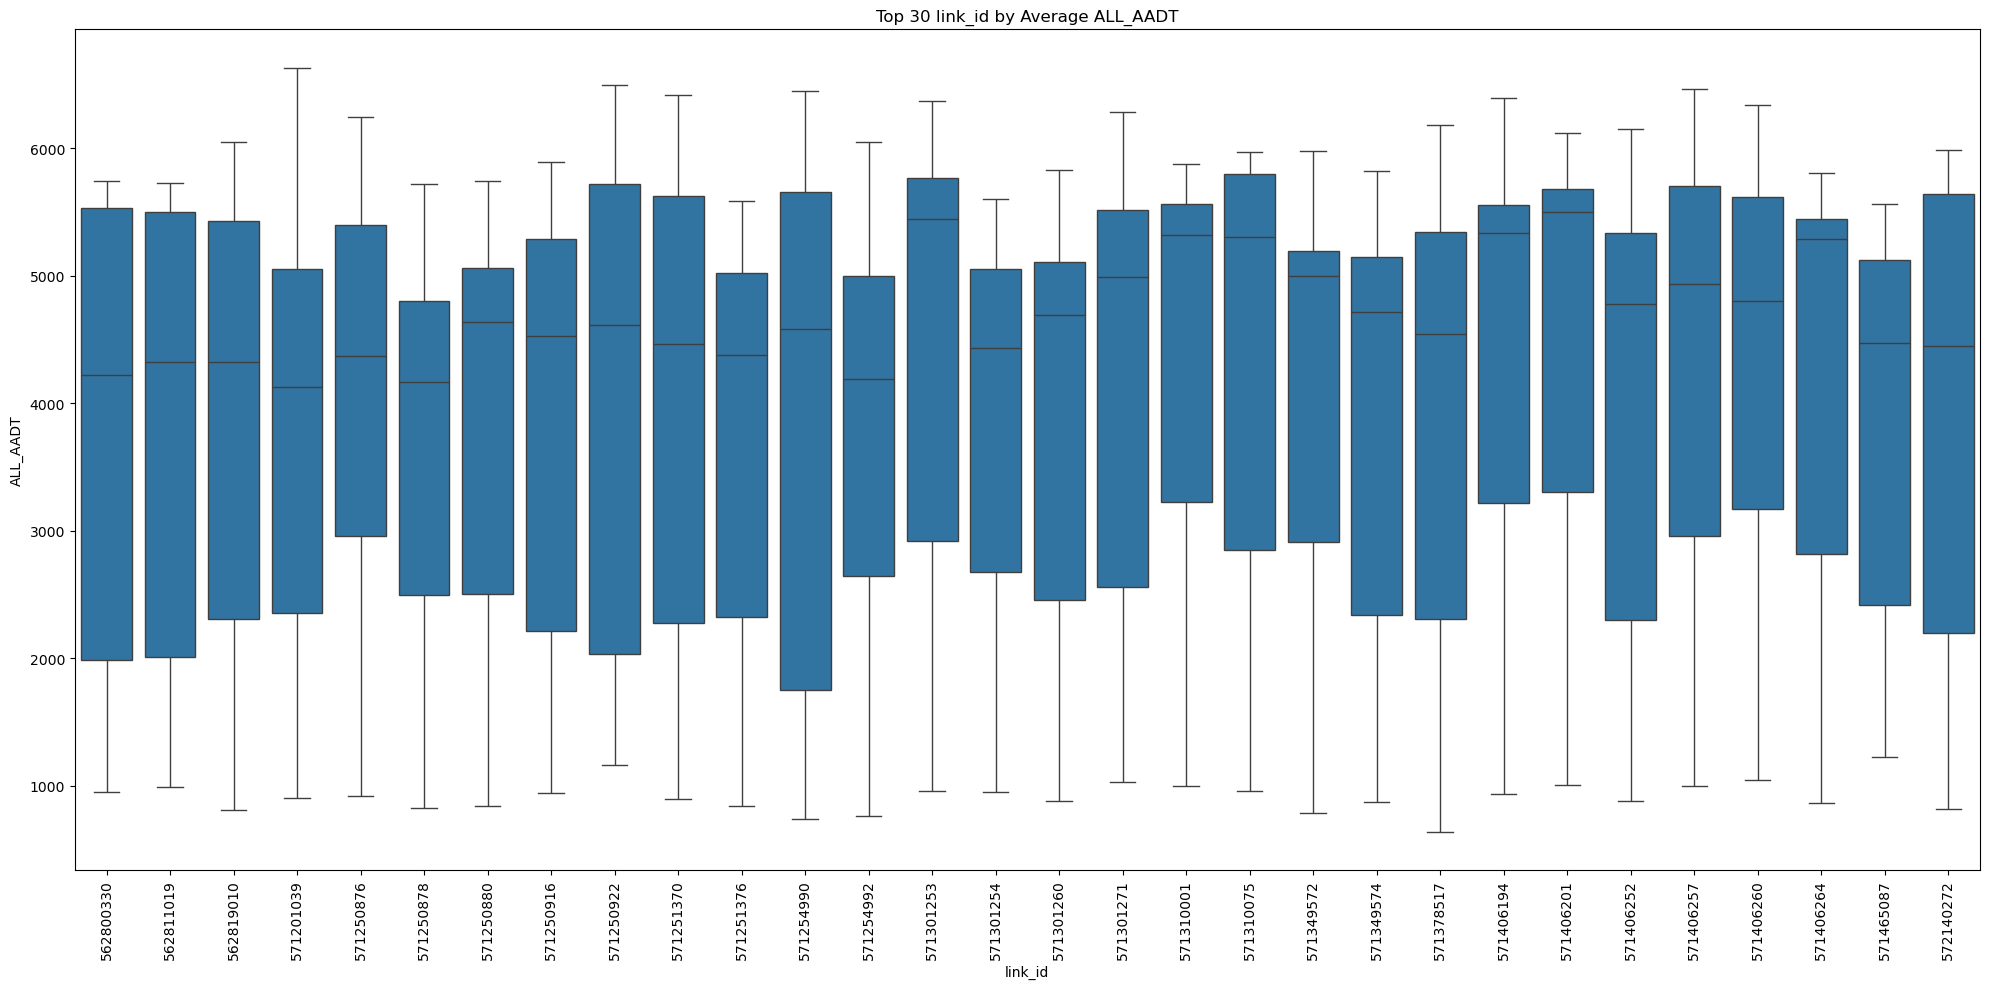

In [100]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    le = LabelEncoder()
    df['road_name'] = df['road_name'].fillna('Unknown')
    df['road_name'] = le.fit_transform(df['road_name'])
    
    df_grouped = df.groupby(['year', 'link_id', 'road_type'])
    X, y = [], []
    for _, group in df_grouped:
        if len(group) == 24:
            group_sorted = group.sort_values('timeslot')
            X.append(group_sorted[['timeslot', 'link_direction_1', 'link_direction_2', 'up_lanes', 'dw_lanes', 'oneway', 'road_rank', 'road_name']].values)
            y.append(group_sorted['ALL_AADT'].values)
    
    return np.array(X), np.array(y)

# 커스텀 데이터셋
class TrafficDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 모델 정의
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        _, h_n = self.gru(x)
        out = self.fc(h_n.squeeze(0))
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n.squeeze(0))
        return out

class CNNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, 64, kernel_size=3)
        self.conv2 = nn.Conv1d(64, 32, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(32, output_dim)
    
    def forward(self, x):
        x = x.transpose(1, 2)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x).squeeze(2)
        out = self.fc(x)
        return out

# 훈련 함수
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, patience=10):
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)
    
    best_val_loss = float('inf')
    epochs_no_improve = 0
    
    train_losses, val_losses = [], []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print('Early stopping!')
                model.load_state_dict(torch.load('best_model.pth'))
                break
    
    return train_losses, val_losses

# 평가 함수
def evaluate_model(model, test_loader, scaler_y):
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)
    model.eval()
    predictions, actuals = [], []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(y_batch.cpu().numpy())
    
    predictions = scaler_y.inverse_transform(np.array(predictions))
    actuals = scaler_y.inverse_transform(np.array(actuals))
    
    mse = np.mean((predictions - actuals)**2)
    mae = np.mean(np.abs(predictions - actuals))
    r2 = 1 - (np.sum((actuals - predictions)**2) / np.sum((actuals - np.mean(actuals))**2))
    
    return predictions, actuals, mse, mae, r2

# 메인 코드
X, y = preprocess_data(df_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

train_dataset = TrafficDataset(X_train_scaled, y_train_scaled)
test_dataset = TrafficDataset(X_test_scaled, y_test_scaled)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

input_dim = X_train.shape[-1]
hidden_dim = 64
output_dim = y_train.shape[-1]

models = {
    'GRU': GRUModel(input_dim, hidden_dim, output_dim),
    'LSTM': LSTMModel(input_dim, hidden_dim, output_dim),
    'CNN': CNNModel(input_dim, output_dim)
}

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)
    
    predictions, actuals, mse, mae, r2 = evaluate_model(model, test_loader, scaler_y)
    
    results[model_name] = {
        'predictions': predictions,
        'actuals': actuals,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'train_losses': train_losses,
        'val_losses': val_losses
    }
    
    print(f"{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

# 결과 시각화
plt.figure(figsize=(15, 5))
for i, (model_name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.scatter(result['actuals'][:, 0], result['predictions'][:, 0], alpha=0.5)
    plt.plot([result['actuals'].min(), result['actuals'].max()], [result['actuals'].min(), result['actuals'].max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Prediction vs Actual')
plt.tight_layout()
plt.show()

# 학습 곡선
plt.figure(figsize=(15, 5))
for i, (model_name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.plot(result['train_losses'], label='Train Loss')
    plt.plot(result['val_losses'], label='Validation Loss')
    plt.title(f'{model_name} Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout()
plt.show()

# 상위 30개 link_id 선택 및 시각화
# link_id별 평균 ALL_AADT 계산
avg_aadt_by_link = df_encoded.groupby('link_id')['ALL_AADT'].mean().sort_values(ascending=False)

# 상위 30개 link_id 선택
top_30_links = avg_aadt_by_link.head(30)

# 상위 30개 link_id에 해당하는 데이터 추출
top_30_data = df_encoded[df_encoded['link_id'].isin(top_30_links.index)]

# 박스플롯으로 시각화
plt.figure(figsize=(20, 10))
sns.boxplot(x='link_id', y='ALL_AADT', data=top_30_data)
plt.title('Top 30 link_id by Average ALL_AADT')
plt.xlabel('link_id')
plt.ylabel('ALL_AADT')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

선택된 데이터 크기: (19172, 26)

고유한 road_name 개수: 10

선택된 road_name:
['서해안고속도로' '수도권제2순환고속도로(봉담동탄' '세종평택로' '경부고속도로' '영동고속도로' '마북로2번길' '신수로'
 '분당-수서간고속화도로' '중부고속도로' '분당수서간고속화도로']

각 road_name별 데이터 개수:
road_name_original
서해안고속도로             4488
경부고속도로              4272
수도권제2순환고속도로(봉담동탄    3408
영동고속도로              2808
신수로                 2680
세종평택로                624
중부고속도로               480
마북로2번길               220
분당-수서간고속화도로          120
분당수서간고속화도로            72
Name: count, dtype: int64


/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:38: UserWarni

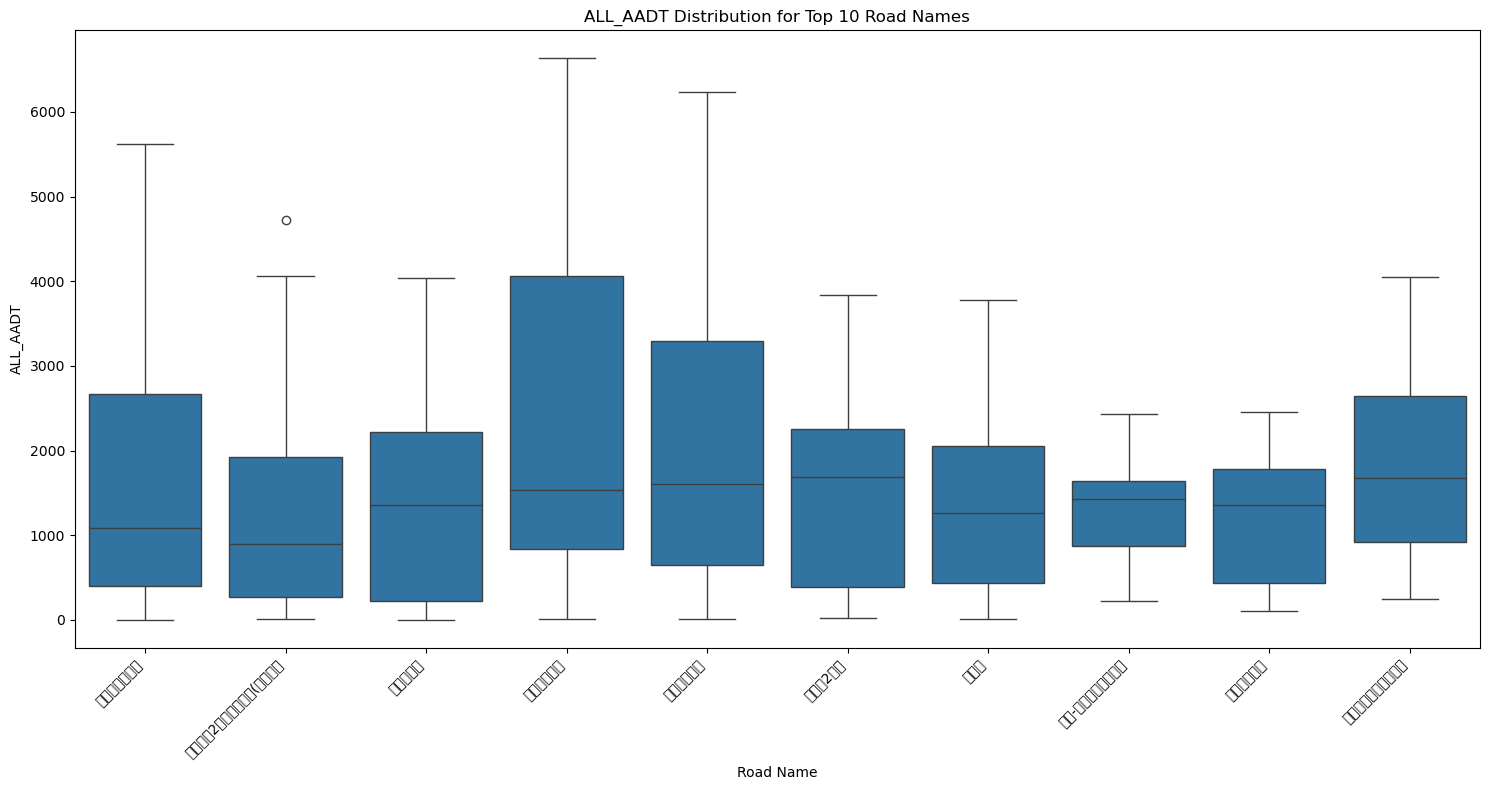

/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/6h/wj8wkfqs0jn4r8m61j8bpq_r0000gn/T/ipykernel_12568/2064000447.py:49: UserWar

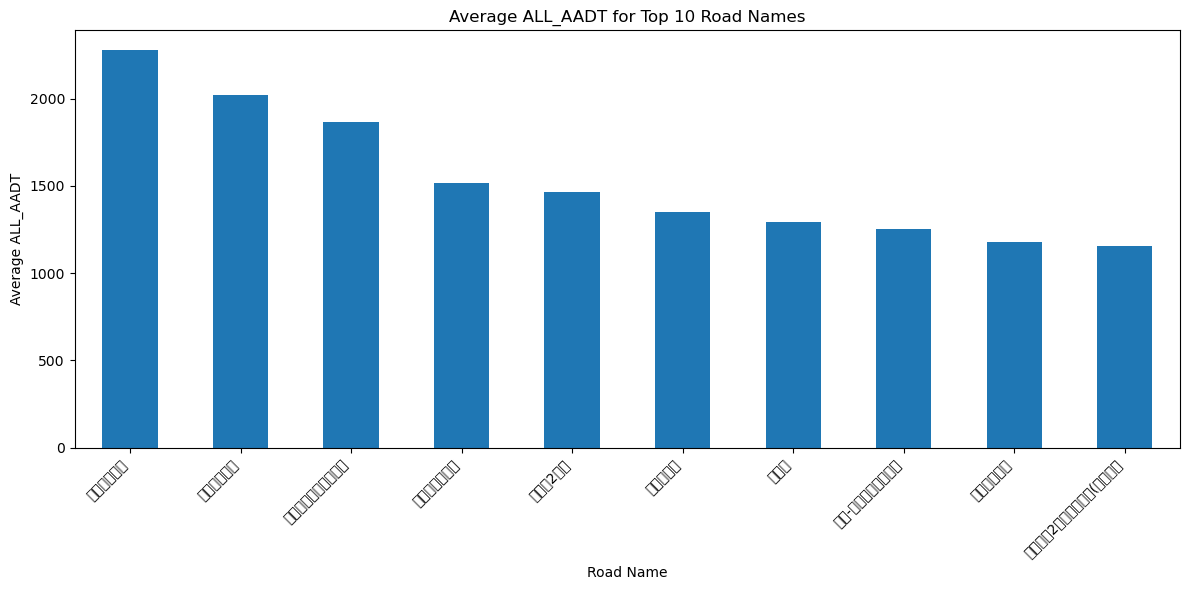

In [101]:
# 한글 폰트 설정(맥북기준)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False 

# LabelEncoder 객체 생성 (이전에 사용한 것과 동일한 방식으로)
le = LabelEncoder()
df_encoded['road_name'] = le.fit_transform(df['road_name'].fillna('Unknown'))

# road_name별 평균 ALL_AADT 계산
avg_aadt_by_road = df_encoded.groupby('road_name')['ALL_AADT'].mean().sort_values(ascending=False)

# 상위 10개 road_name 선택
top_10_road_names_encoded = avg_aadt_by_road.head(10).index

# 인코딩된 road_name을 원래 이름으로 변환
top_10_road_names_original = le.inverse_transform(top_10_road_names_encoded)

# 선택된 10개 road_name에 해당하는 데이터 추출
top_10_road_data = df_encoded[df_encoded['road_name'].isin(top_10_road_names_encoded)].copy()

# road_name 열을 원래 이름으로 변환
top_10_road_data['road_name_original'] = le.inverse_transform(top_10_road_data['road_name'])

# 결과 확인
print("선택된 데이터 크기:", top_10_road_data.shape)
print("\n고유한 road_name 개수:", top_10_road_data['road_name_original'].nunique())
print("\n선택된 road_name:")
print(top_10_road_data['road_name_original'].unique())

# 각 road_name별 데이터 개수 확인
road_name_counts = top_10_road_data['road_name_original'].value_counts()
print("\n각 road_name별 데이터 개수:")
print(road_name_counts)

# 시각화: 각 road_name별 ALL_AADT 분포
plt.figure(figsize=(15, 8))
sns.boxplot(x='road_name_original', y='ALL_AADT', data=top_10_road_data)
plt.title('ALL_AADT Distribution for Top 10 Road Names')
plt.xlabel('Road Name')
plt.ylabel('ALL_AADT')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 시각화: 각 road_name별 평균 ALL_AADT
plt.figure(figsize=(12, 6))
avg_aadt_top_10 = top_10_road_data.groupby('road_name_original')['ALL_AADT'].mean().sort_values(ascending=False)
avg_aadt_top_10.plot(kind='bar')
plt.title('Average ALL_AADT for Top 10 Road Names')
plt.xlabel('Road Name')
plt.ylabel('Average ALL_AADT')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()